# Lung Cancer Prediction

### Lung cancer, also known as lung carcinoma, is a malignant lung tumor characterized by uncontrolled cell growth in tissues of the lung. This growth can spread beyond the lung by the process of metastasis into nearby tissue or other parts of the body.

In this study, we tried to predict Lung Cancer using 6 different algorithm:

1)Logistic regression classification

2)Naive bayes classification

3)Decision tree classification

4)Random forest classification

5)K-Nearest Neighbor classification


Importing Libraries

In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

Data

In [25]:
data = pd.read_csv('C:/Users/Joselyn Cindrella M/Desktop/lung_cancer_examples.csv')
data.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [26]:
print('Dataset :',data.shape)

Dataset : (59, 7)


In [27]:
data[0:10]

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1
5,Cristiano,Ronaldo,34,0,10,0,0
6,Mihail,Tal,58,15,10,0,0
7,Kathy,Bates,22,12,5,2,0
8,Nicole,Kidman,45,2,6,0,0
9,Ray,Milland,52,18,4,5,1


Distribution of diagnosis

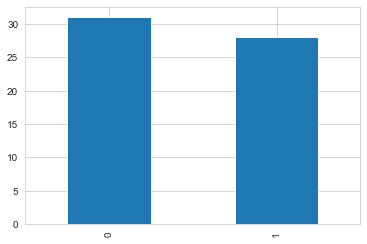

In [28]:
data.Result.value_counts()[0:30].plot(kind='bar')
plt.show()

Visulizing the data

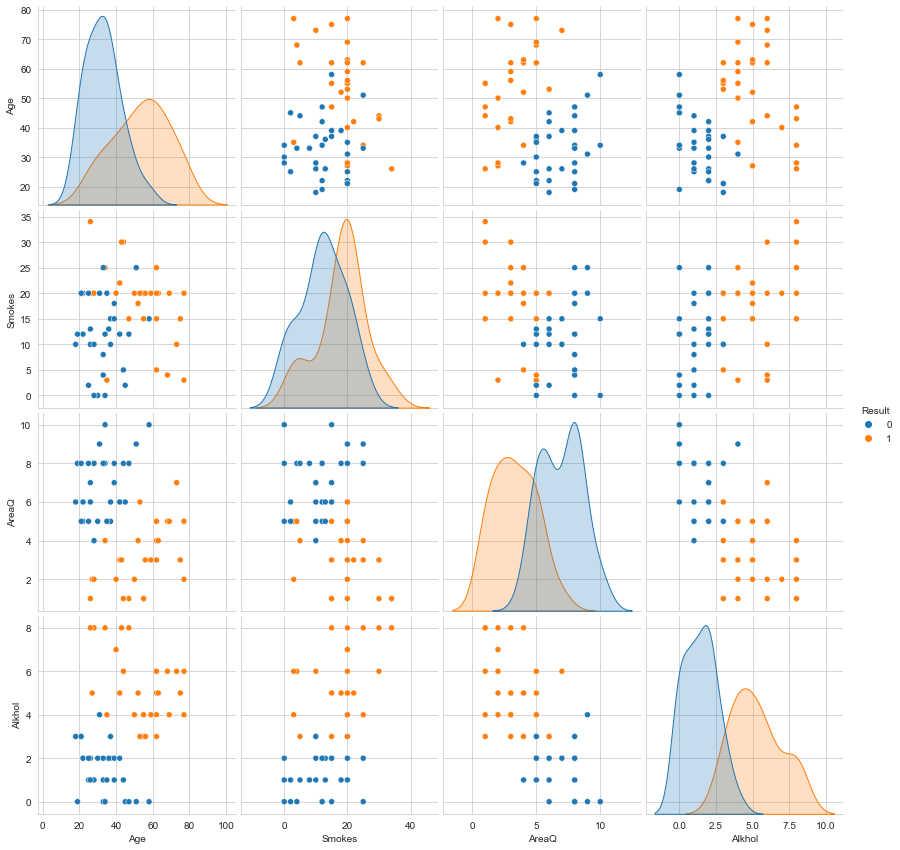

In [29]:
sns.set_style("whitegrid")
sns.pairplot(data,hue="Result",size=3);
plt.show()

Eliminate irrelevant variables

In [30]:
data1 = data.drop(columns=['Name','Surname'],

                 axis=1)
data1 = data1.dropna(how='any')
print(data1.shape)
data1.head()

(59, 5)


,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


Observations

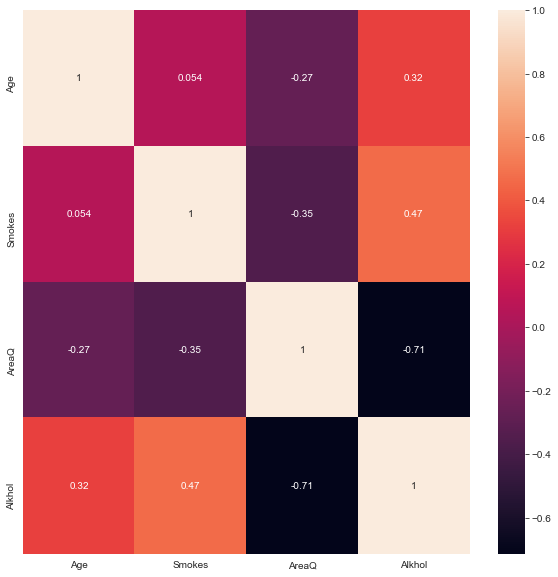

In [31]:
correlation = data1.drop(['Result'], axis=1).corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True)
plt.show()

AreaQ is negatively correlated with Alkhol and Smokes.

Alkhol is positively correlated with Age and Smokes.

Data for training and testing

In [32]:
from sklearn.model_selection import train_test_split
Y = data1['Result']
X = data1.drop(columns=['Result'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.50, random_state=9)

In [33]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (29, 4)
Y train shape:  (29,)
X test shape:  (30, 4)
Y test shape:  (30,)


# 1. Logistic regression classification

In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=10)
logreg.fit(X_train, Y_train)
Y_predict1 = logreg.predict(X_test)

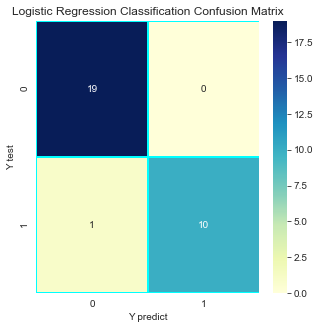

0.9666666666666667


In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

logreg_cm = confusion_matrix(Y_test, Y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

score_logreg = logreg.score(X_test, Y_test)
print(score_logreg)

# 2. Naive bayes classification

In [36]:
from sklearn.naive_bayes import GaussianNB
nbcla = GaussianNB()
nbcla.fit(X_train, Y_train)
Y_predict3 = nbcla.predict(X_test)

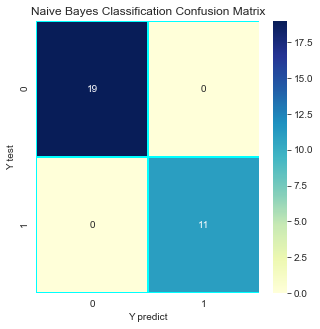

1.0


In [37]:
nbcla_cm = confusion_matrix(Y_test, Y_predict3)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nbcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Naive Bayes Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

score_nbcla = nbcla.score(X_test, Y_test)
print(score_nbcla)

# 3. Decision tree classification

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtcla = DecisionTreeClassifier(random_state=9)
dtcla.fit(X_train, Y_train)
Y_predict4 = dtcla.predict(X_test)

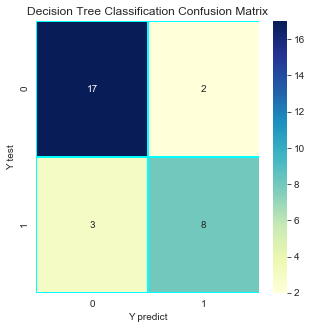

0.8333333333333334


In [39]:
dtcla_cm = confusion_matrix(Y_test, Y_predict4)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

score_dtcla = dtcla.score(X_test, Y_test)
print(score_dtcla)

# 4. Random forest classification

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfcla = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)
rfcla.fit(X_train, Y_train)
Y_predict5 = rfcla.predict(X_test)

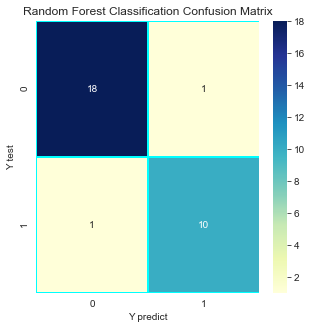

0.9333333333333333


In [41]:
rfcla_cm = confusion_matrix(Y_test, Y_predict5)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

score_rfcla = rfcla.score(X_test, Y_test)
print(score_rfcla)

# 5. K-Nearest Neighbor classification

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knncla = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
knncla.fit(X_train, Y_train)
Y_predict6 = knncla.predict(X_test)

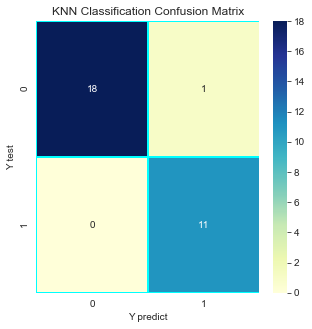

0.9666666666666667


In [43]:
knncla_cm = confusion_matrix(Y_test, Y_predict6)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knncla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

score_knncla= knncla.score(X_test, Y_test)
print(score_knncla)

# Test score

In [44]:
Testscores = pd.Series([score_logreg, score_nbcla, score_dtcla, score_rfcla, score_knncla], 
                        index=['Logistic Regression Score', 'Naive Bayes Score', 'Decision Tree Score', 'Random Forest Score', 'K-Nearest Neighbour Score']) 
print(Testscores)

Logistic Regression Score    0.966667
Naive Bayes Score            1.000000
Decision Tree Score          0.833333
Random Forest Score          0.933333
K-Nearest Neighbour Score    0.966667
dtype: float64


The confusion matrix

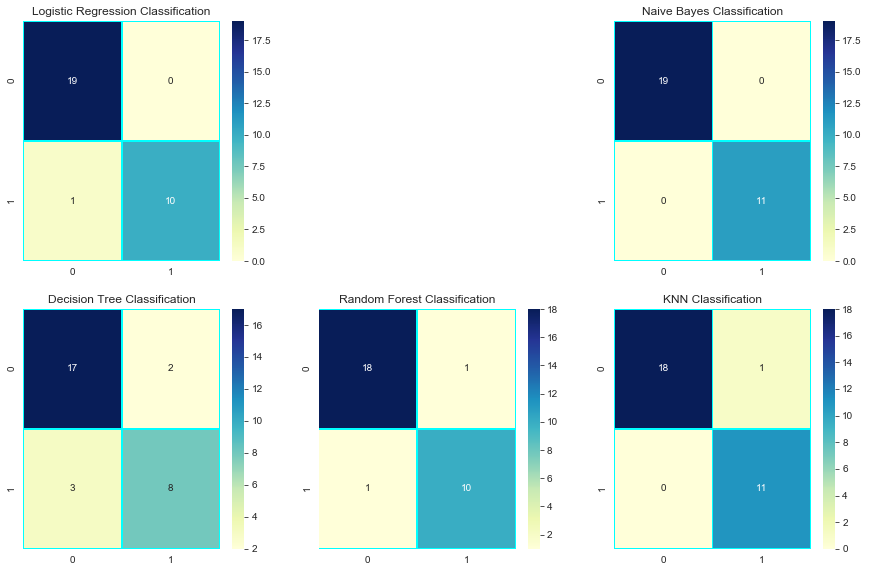

In [45]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('Logistic Regression Classification') 
ax2 = fig.add_subplot(3, 3, 3)
ax2.set_title('Naive Bayes Classification')
ax3 = fig.add_subplot(3, 3, 4)
ax3.set_title('Decision Tree Classification')
ax4 = fig.add_subplot(3, 3, 5)
ax4.set_title('Random Forest Classification')
ax5 = fig.add_subplot(3, 3, 6)
ax5.set_title('KNN Classification')
sns.heatmap(data=logreg_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax1)
sns.heatmap(data=nbcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax2)
sns.heatmap(data=dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax3)
sns.heatmap(data=rfcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax4)
sns.heatmap(data=knncla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax5)
plt.show()

# ROC curve

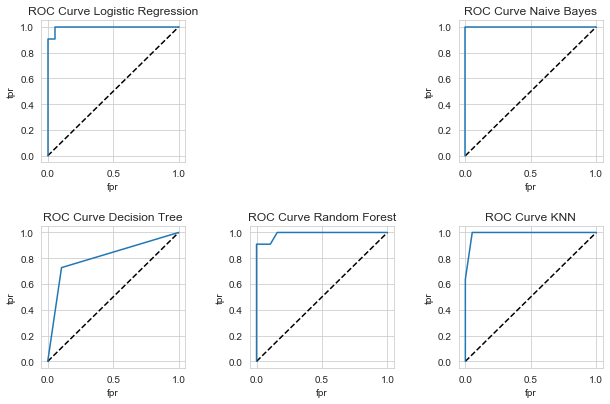

In [46]:
from sklearn.metrics import roc_curve

# Logistic Regression Classification
Y_predict1_proba = logreg.predict_proba(X_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict1_proba)
plt.subplot(331)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Logistic Regression')
plt.grid(True)

# Naive Bayes Classification
Y_predict3_proba = nbcla.predict_proba(X_test)
Y_predict3_proba = Y_predict3_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict3_proba)
plt.subplot(333)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes')
plt.grid(True)

# Decision Tree Classification
Y_predict4_proba = dtcla.predict_proba(X_test)
Y_predict4_proba = Y_predict4_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict4_proba)
plt.subplot(334)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Decision Tree')
plt.grid(True)

# Random Forest Classification
Y_predict5_proba = rfcla.predict_proba(X_test)
Y_predict5_proba = Y_predict5_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict5_proba)
plt.subplot(335)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Random Forest')
plt.grid(True)

# KNN Classification
Y_predict6_proba = knncla.predict_proba(X_test)
Y_predict6_proba = Y_predict6_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict6_proba)
plt.subplot(336)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve KNN')
plt.grid(True)

plt.subplots_adjust(top=2, bottom=0.08, left=0.10, right=1.4, hspace=0.45, wspace=0.45)
plt.show()